SISTEM LINEAR DAN METODE ELIMINASI GAUSSIAN

ELIMINASI GAUSSIAN

Eliminasi gaussian ditemukan oleh Carl Friedrich Guss,metode ini dapat dimanfaatkan dalam memecahkan sistem persamaan linear dengan merepresentasikan (mengubah) menjadi bentuk matriks,matriks tersebut lalu diubah dalam bentuk Eselon Baris melalui operasi Baris Elemter. lalu sistem diselesaikan dengan subtitusi balik.

Bentuk Eselon Baris

suatu matriks memiliki bentuk Eselon Baris jika memenuhi 3 kriteria sebagai berikut:

Jika didalam baris terdapat elemen-elemen yang tidak semuanya nol, maka bilangan tak nol pertama di dalam baris tersebut adalah 1.
kalau ada baris-baris yang semua elemennya bernilai 0 semua, maka baris-baris tersebut harus dikelompokkan dan diletakkan dibagian bawah matriks.

Jika terdapat dua baris berurutan yang memenuhi kriteria pertama, maka angka 1 (pertama/utama) dari baris yang lebih rendah berada lebih kekanan dari angka 1(pertama/utama) baris yang diatasnya.

ADA3 OPERASI YANG BISA DILAKUKAN

Tukarkan posisi kedua persamaan.

Kalikan persamaan dengan bilangan apa pun yang bukan nol.

Gantikan suatu persamaan dengan jumlah persamaan itu sendiri dan kelipatan persamaan lainnya.

yang pertama deklarasikan RowSwap, RowAdd dan RowScale untuk perhitungan selanjutnya:

Selesaikan persamaan berikut ini dengan metode Eliminasi Gaussian.

$$
8x_1+x_2+x_3=19\\
x_1+2x_2+3x_3=9\\
2x_1+x_2+x_3=5
$$


In [1]:
import numpy as np

def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

buat array NumPy dengan nilai-nilai ini. Kita akan memberi nama pada array A, sehingga kita bisa memanggilnya lagi nanti.

In [2]:
import numpy as np
A=np.array([[8,9,1,19],[1,2,3,9],[2,1,1,5]])
print(A)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


In [3]:
#pindahkan baris 0 ke baris 1
A1 = RowSwap(A, 0, 1)
print(A1)

[[ 1.  2.  3.  9.]
 [ 8.  9.  1. 19.]
 [ 2.  1.  1.  5.]]


In [4]:
# tambahkan -8 kali baris 0 ke baris 1
A2 = RowAdd(A1, 0, 1, -8)
print(A2)

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  2.   1.   1.   5.]]


In [5]:
#tambahkan -2 kali baris 0 ke baris 2
A3 = RowAdd(A2, 0, 2, -2)
print(A3)

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  0.  -3.  -5. -13.]]


In [6]:
#kalikan baris 1 dengan -1/7
A4 = RowScale(A3, 1, -1/7)
print(A4)

[[  1.           2.           3.           9.        ]
 [ -0.           1.           3.28571429   7.57142857]
 [  0.          -3.          -5.         -13.        ]]


In [7]:
#tambahkan 3 kali baris 1 ke baris 2
A5 = RowAdd(A4, 1, 2, 3)
print(A5)

[[ 1.          2.          3.          9.        ]
 [-0.          1.          3.28571429  7.57142857]
 [ 0.          0.          4.85714286  9.71428571]]


In [8]:
#kalikan baris 2 dengan 1/4
A6 = RowScale(A5, 2, 1/4)
print(A6)

[[ 1.          2.          3.          9.        ]
 [-0.          1.          3.28571429  7.57142857]
 [ 0.          0.          1.21428571  2.42857143]]


Dari matriks terakhir tersebut sudah memenuhi ketiga kriteria bentuk eselon baris. Selanjutnya tinggal mengubahnya kembali menjadi sistem persamaan linear
$$
x_1+2x_2+3x_3=9\\
x_2+3.28571429x_3=7.57142857\\
x_3=2\\
$$


In [9]:
#selesaikan persamaanya
x3 = 2
print('x3:', x3)
x2 = 7.57142857-(3.28571429*x3)
print("x2:", round(x2))
x1 = 9 - 2*x2 - 3*x3
print('x1:', round(x1))

x3: 2
x2: 1
x1: 1


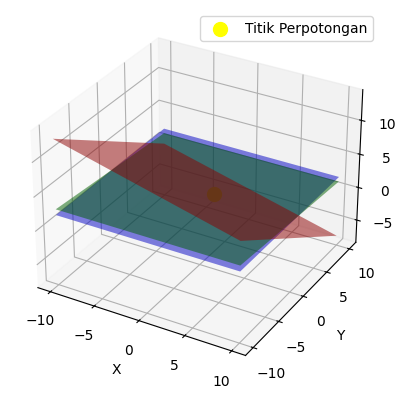

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Koefisien untuk masing-masing persamaan bidang
a1, b1, c1, r1 = 1, 2, 3, 9
a2, b2, c2, r2 = 0, 1, 13, 27
a3, b3, c3, r3 = 0, 0, 1, 2

# Buat data x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Buat grid x, y
X, Y = np.meshgrid(x, y)

# Hitung nilai z sesuai dengan persamaan bidang
Z1 = (r1 - a1*X - b1*Y) / c1
Z2 = (r2 - a2*X - b2*Y) / c2
Z3 = (r3 - a3*X - b3*Y) / c3

# Plot persamaan bidang dalam tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot bidang
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

# Titik perpotongan
A = np.array([[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]])
B = np.array([r1, r2, r3])
intersect = np.linalg.solve(A, B)
ax.scatter(intersect[0], intersect[1], intersect[2], color='yellow', s=100, label='Titik Perpotongan')

# Label sumbu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()